# Attribute Information¶


In [ ]:
ID : Customer ID
Age : Customer's age in completed years
Experience : No. of years of professional experience
Income : Annual income of the customer 

ZIP Code : Home Address Zip Code

Family : Family size of the customer
CCAvg : Avg. Spending on Credit Card per Month 

Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced / Professional

Mortgage : Value of house mortgage if any. 
Personal Loan : Did this customer accept the personal loan offered in the last campaign?
Securities Account : Does the customer have a securities account with the bank?
CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
Online : Does the customer use internet banking facilities?
Credit card : Does the customer use a credit card issued by this Bank?
    

In [3]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing the dataset by giving the path and displaying values
df=pd.read_csv("C:\\Users\\nanasaheb\\ML_Project\\Bank_Personal_Loan_Modelling.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [6]:
# Checking rows and Columns of dataset

df.shape

(5000, 14)

In [7]:
# Obtaining all the information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# Describing entire Dataset 

df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
#finding unique data
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [10]:
#from the above table experience  has -ve which is not correct .we will remove the -ve values 
#from this variable and make those 0

In [11]:
df.loc[df.Experience<0,['Experience']]=0
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
# checking the existance of Null values in each column

df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [13]:
# Checking the number of Null Values in each column
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [14]:
#There are no missing values

In [15]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [16]:
df.drop(["ID","ZIP Code"],axis=1,inplace=True)

In [17]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# Exploratory data analysis

In [18]:
# Dividing the columns in the dataset in to numeric 
cols = set(df.columns)
cols_numeric = set(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])
cols_numeric

{'Age', 'CCAvg', 'Experience', 'Income', 'Mortgage'}

In [19]:
#and categorical attributes.
cols_cat=list(cols-cols_numeric)
cols_cat

['Securities Account',
 'CD Account',
 'Online',
 'Family',
 'Education',
 'CreditCard',
 'Personal Loan']

In [20]:
for x in cols_cat:
    df[x]=df[x].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   category
 8   Securities Account  5000 non-null   category
 9   CD Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.4 KB


In [22]:
#From the data we can say that the variables types are- Numeric: Age, Experience, Income, CCAvg, Mortgage
#Categorical: Family, Personal Loan, Securities Account, CD Account, Online, Education,Credit Card

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


In [24]:
df_num=df.select_dtypes(["int64","float64"])
df_num

,Age,Experience,Income,CCAvg,Mortgage
0,25,1,49,1.6,0
1,45,19,34,1.5,0
2,39,15,11,1.0,0
3,35,9,100,2.7,0
4,35,8,45,1.0,0
...,...,...,...,...,...
4995,29,3,40,1.9,0
4996,30,4,15,0.4,85
4997,63,39,24,0.3,0
4998,65,40,49,0.5,0


In [25]:
df_cat=df.select_dtypes(['category'])
df_cat

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,4,1,0,1,0,0,0
1,3,1,0,1,0,0,0
2,1,1,0,0,0,0,0
3,1,2,0,0,0,0,0
4,4,2,0,0,0,0,1
...,...,...,...,...,...,...,...
4995,1,3,0,0,0,1,0
4996,4,1,0,0,0,1,0
4997,2,3,0,0,0,0,0
4998,3,2,0,0,0,1,0


In [26]:
#Successfully separated the categorical columns and numericl columns

In [27]:
print(df.groupby('Personal Loan').size())

Personal Loan
0    4520
1     480
dtype: int64


# Data visualisation

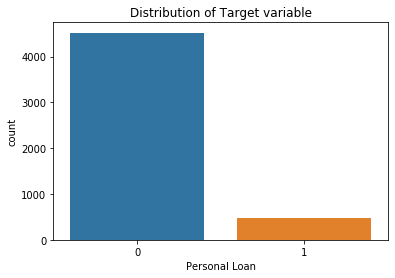

In [28]:
sns.countplot(df['Personal Loan'],label='Count')
plt.title('Distribution of Target variable')
plt.show()

In [29]:
'''
we are predict to personal loan
0 means -ve response 
1 means result of campaign from personal loan
in dataset,we have only 480 ,highly imbalance data
'''

'\nwe are predict to personal loan\n0 means -ve response \n1 means result of campaign from personal loan\nin dataset,we have only 480 ,highly imbalance data\n'

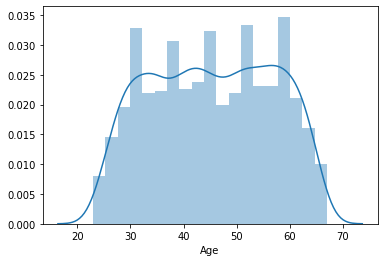

Age - -0.029331878574766698
-----------------------------------------------


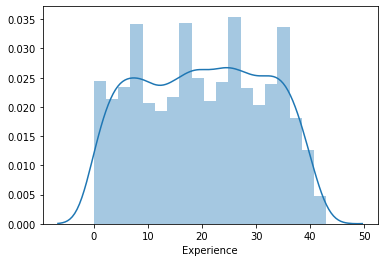

Experience - -0.017215538722506932
-----------------------------------------------


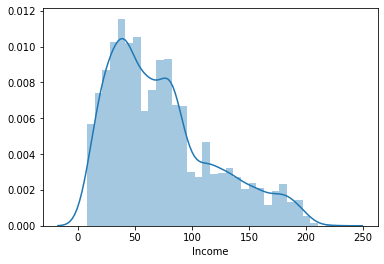

Income - 0.8410861846424931
-----------------------------------------------


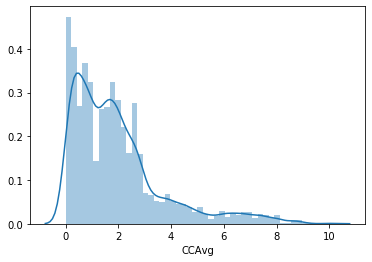

CCAvg - 1.5979637637001873
-----------------------------------------------


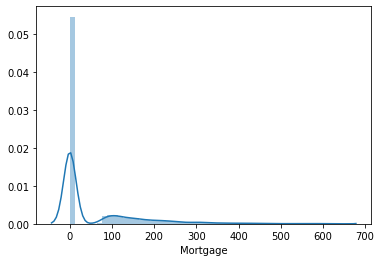

Mortgage - 2.103371065804789
-----------------------------------------------


In [30]:
for col in df_num:
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()
    
    print(col,"-",skew(df_num[col]))
    print("-----------------------------------------------")

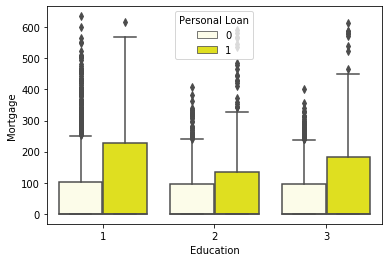

In [31]:
sns.boxplot(x=df['Education'], y=df['Mortgage'], hue=df['Personal Loan'], data=df_cat,color='yellow')
plt.show()

In [32]:
#customer who do not have personal loan and customer who has personal loan have high mortgage

In [33]:
def viewsummary(x):
    x_max=df[x].max()
    x_min=df[x].min()
    q1=df[x].quantile(0.25)
    q2=df[x].quantile(0.50)
    q3=df[x].quantile(0.75)
    print("Max=",x_max)
    print('Q1=',q1)
    print('Q2=',q2)
    print('Q3=',q3)
    print("Min=",x_min)    


In [34]:
viewsummary('Age')
#We see that the age of the customers are uniformly distributed between 
#the Min age of 23 and Max age of 67.


Max= 67
Q1= 35.0
Q2= 45.0
Q3= 55.0
Min= 23


In [35]:
viewsummary('Experience')
#work experience of the customers are uniformly distributed 
#between the Minimum of 0 and Maximum of 43.

Max= 43
Q1= 10.0
Q2= 20.0
Q3= 30.0
Min= 0


In [36]:
viewsummary('Income')
#We see that the income of the customers are skewed to the left with a median income of $64,000.
#The Income attribute also has a lot of outlier values.

Max= 224
Q1= 39.0
Q2= 64.0
Q3= 98.0
Min= 8


In [37]:
viewsummary('CCAvg')
'''
 The Average Monthly Credit Card spending of the customers are skewed heavily to the left,
 with a lot of outlier values.
'''

Max= 10.0
Q1= 0.7
Q2= 1.5
Q3= 2.5
Min= 0.0


'\n The Average Monthly Credit Card spending of the customers are skewed heavily to the left,\n with a lot of outlier values.\n'

In [38]:
viewsummary('Mortgage')

Max= 635
Q1= 0.0
Q2= 0.0
Q3= 101.0
Min= 0


In [39]:
'''
the Mortgage amount of the customers are skewed heavily to the left,
with a lot of outlier values.
'''

'\nthe Mortgage amount of the customers are skewed heavily to the left,\nwith a lot of outlier values.\n'

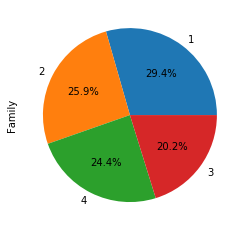

Family
-----------------------------------------------


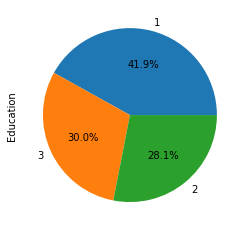

Education
-----------------------------------------------


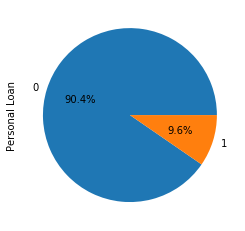

Personal Loan
-----------------------------------------------


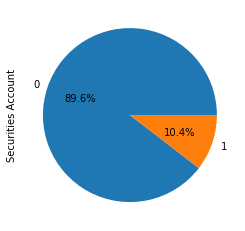

Securities Account
-----------------------------------------------


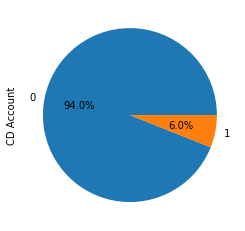

CD Account
-----------------------------------------------


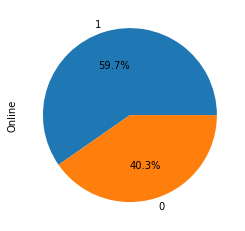

Online
-----------------------------------------------


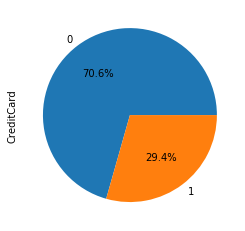

CreditCard
-----------------------------------------------


In [41]:
for col in df_cat:
    plt.figure()    
    df[col].value_counts().plot(kind="pie",autopct="%1.1f%%")  
    plt.show()    
    print(col)
    print("-----------------------------------------------")




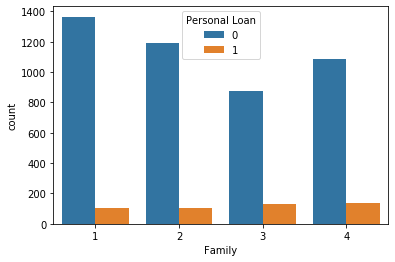

In [42]:
sns.countplot(x=df['Family'], hue=df['Personal Loan'], data=df_cat) 
plt.show() 

In [43]:
#Family size does not have any impact in personal loan.
#But it seems families with size of 3 are more likely to take loan. 
#When considering future campaign this might be good association.

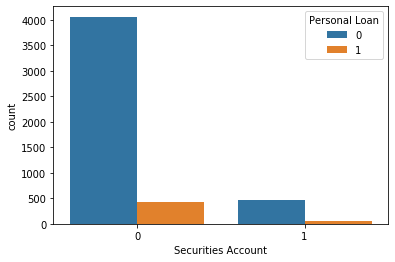

In [44]:
sns.countplot(x=df['Securities Account'], hue=df['Personal Loan'], data=df_cat) 
plt.show()    
    

In [45]:
#The distribution of 'CD Account' and 'Securities Account' are heavily imbalanced.
#Customers who does not have CD account , does not have loan as well. This seems to be majority. 
#But almost all customers who has CD account has loan as well


# Multivariate Analysis

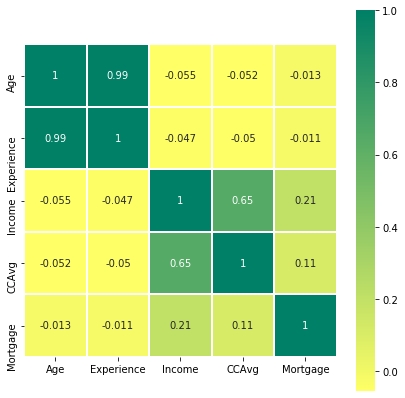

In [46]:
x=df.drop('Personal Loan',axis=1)
y=df.iloc[:,-5]
cor=x.corr()
plt.figure(figsize=(7,7))
sns.heatmap(cor,annot=True,cmap = 'summer_r', square=True, linewidth=1)
plt.show()

In [ ]:
#We see there is a very strong positive correlation between Age and Work Experience,
#which is expected.
#There is also a positive correlation between Income and Credit Card spending.


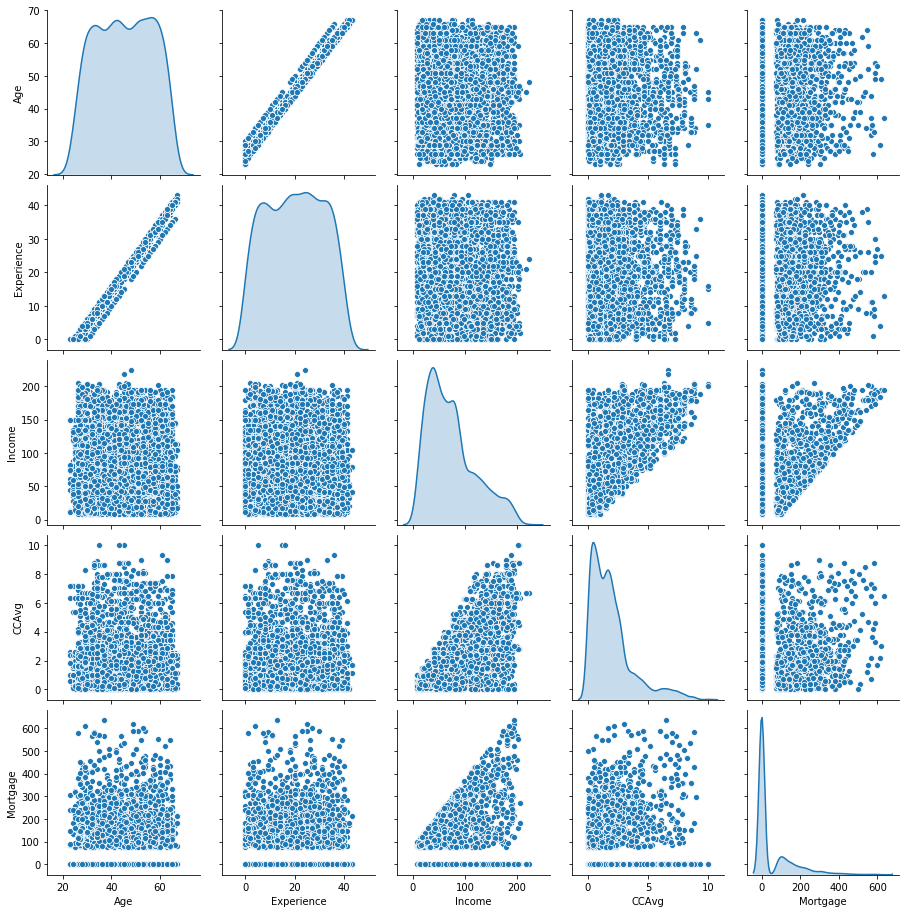

In [47]:
# All Dependent variables to see their inter-relations.
sns.pairplot(x, diag_kind = 'kde', vars = list(df_num.columns))
plt.show()

# Data Preprocessing

Applying Model

# 1.Logistic Regression

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,recall_score,precision_score,f1_score 


In [69]:
#To split into training and testing data in ratio of 70:30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [70]:
lr=LogisticRegression()

In [71]:
lr.fit(x_train,y_train)

LogisticRegression()

In [72]:
y_pred=lr.predict(x_test)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.55      0.66       149

    accuracy                           0.94      1500
   macro avg       0.89      0.77      0.82      1500
weighted avg       0.94      0.94      0.94      1500



In [76]:
print(confusion_matrix(y_test,y_pred))


[[1334   17]
 [  67   82]]


# 2.Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [80]:
dt_model.score(x_test , y_test)

0.972

In [81]:
y_pred = dt_model.predict(x_test)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1351
           1       0.91      0.79      0.85       149

    accuracy                           0.97      1500
   macro avg       0.95      0.89      0.92      1500
weighted avg       0.97      0.97      0.97      1500



In [60]:
print(confusion_matrix(y_test,y_pred))

[[1340   11]
 [  31  118]]


# 3.Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10)

In [85]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [86]:
y_pred = rf.predict(x_test)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.97      0.83      0.90       149

    accuracy                           0.98      1500
   macro avg       0.98      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [88]:
print(confusion_matrix(y_test,y_pred))

[[1347    4]
 [  25  124]]


# 4.KNN 

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn = KNeighborsClassifier(n_neighbors=7)

In [91]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [92]:
 y_pred = knn.predict(x_test)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.54      0.34      0.41       149

    accuracy                           0.91      1500
   macro avg       0.74      0.65      0.68      1500
weighted avg       0.89      0.91      0.90      1500



In [94]:
print(confusion_matrix(y_test,y_pred))

[[1309   42]
 [  99   50]]


# Conclusion:

In [ ]:
After comparing the outputs generated by all the 4 models, the Accuracy given are as follows:

Logistic Regression - 94% 

Decision Tree-97%

RandomForest-98%

KNN - 91% 
Hence Random Forest is the best model for this case & it performs better than others as above accuracy